<strong><h3>Text classification using Naïve Bayes Classifier</h3></strong>

In [139]:
import string as str
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import PorterStemmer
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score ,  confusion_matrix
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB , CategoricalNB
 

In [114]:
name = ['Category' , "description"]
df = pd.read_csv("Test classification dataset/ecommerceDataset.csv" , names= name)
df.head()

,Category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [115]:
print("     before  ")

print(df.isnull().sum())
df.dropna(inplace= True)
print("\n     after  " )
print(df.isnull().sum())

     before  
Category       0
description    1
dtype: int64

     after  
Category       0
description    0
dtype: int64


In [116]:
print("before duplicates : " , df.duplicated().sum())
df.drop_duplicates(inplace= True)
print("after duplicates : " ,df.duplicated().sum())

before duplicates :  22622
after duplicates :  0


In [117]:
df.shape

(27802, 2)

<Axes: ylabel='count'>

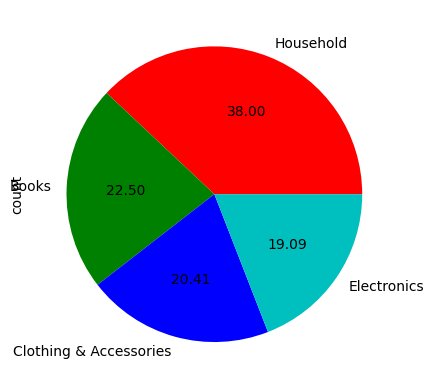

In [118]:
# EDA
df['Category'].value_counts().plot(kind= "pie" , autopct = "%.2f" , colors=["r", "g", "b", "c"] )

In [119]:
df['Category'].value_counts()

Category
Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: count, dtype: int64

In [120]:
# Wordcloud

wc_household = WordCloud(width = 750 , height = 750 , min_font_size = 10 , background_color = 'black')
wc_electonics = WordCloud(width = 750 , height = 750 , min_font_size = 10 , background_color = 'black')
wc_fashion = WordCloud(width = 750 , height = 750 , min_font_size = 10 , background_color = 'black')
wc_books = WordCloud(width = 750 , height = 750 , min_font_size = 10 , background_color = 'black')
household_wc = wc_household.generate(df[df['Category'] == "Household"]['description'].str.cat(sep = ' '))
fashion_wc = wc_fashion.generate(df[df['Category'] == "Clothing & Accessories"]['description'].str.cat(sep = ' '))
electonics_wc = wc_electonics.generate(df[df['Category'] == "Electronics"]['description'].str.cat(sep = ' '))
books_wc = wc_books.generate(df[df['Category'] == "Books"]['description'].str.cat(sep = ' '))

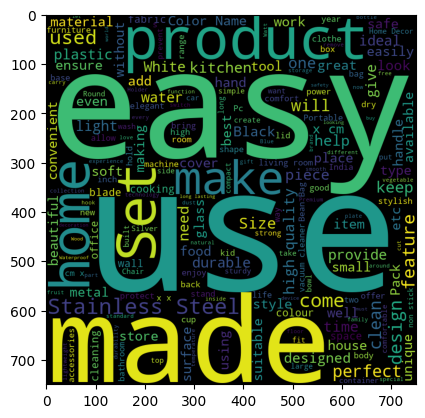

In [121]:
# word colud of category : household
plt.imshow(wc_household)

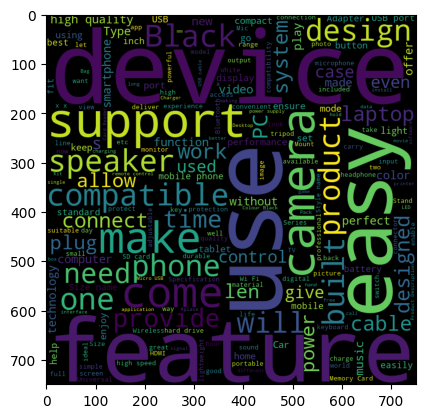

In [122]:
# word colud of category : electonics
plt.imshow(wc_electonics)

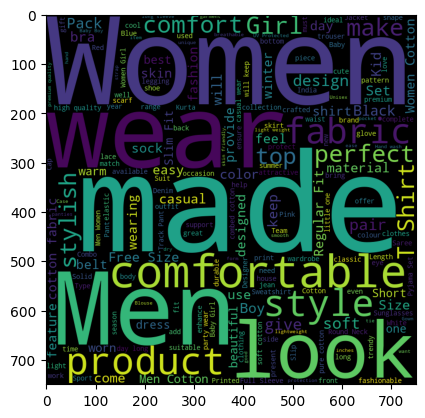

In [123]:
# word colud of category : fashion
plt.imshow(wc_fashion)

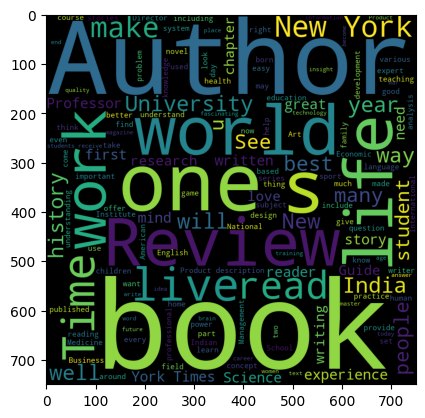

In [124]:
# word colud of category : books
plt.imshow(wc_books)

In [125]:
# Data preprocessing
import re
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocessing(text):
    text = text.lower() # Lowercase the word

    filter_words = [ps.stem(word) for word in text.split() if word not in stop_words and word not in string.punctuation] # stopword removal

    filter_word_final = [word for word in filter_words if word.isalpha()]
   
    return " ".join(filter_word_final)

df['description'] = df['description'].apply(preprocessing)

In [126]:
df['description'].iloc[1]

'saf frame paint inch x special effect uv print paint made synthet frame uv textur print give multi effect attract toward special seri paint make wall beauti give royal touch perfect gift special'

In [127]:
# Split input and label
y = df['Category']
X = df["description"]

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 42)


In [128]:
# label encoder 
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [129]:
# Vectorisation of input text

cv = CountVectorizer()
tf_idf = TfidfVectorizer()

X_train =cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [130]:
X_test.shape , X_train.shape

((5561, 34380), (22241, 34380))

In [134]:
mlb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [135]:
classifier = {
    "MultinomialNB" : mlb,
    "GaussianNB" : gnb,
    "BernoulliNB" : bnb,
}

In [136]:
def evaluate(names , clf , X_train , y_train , X_test , y_test):
    clf.fit(X_train , y_train )
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test , y_pred)
    pre = precision_score(y_test , y_pred , average= "weighted")
    print(f"For {names}")
    print("Accuracy : " , acc)
    print("precision : " , pre)
    print("\n")
    return acc , pre

accuracy = []
precision = []
for name , clf in classifier.items():
    acc , pre = evaluate(name , clf , X_train , y_train , X_test , y_test)
    accuracy.append(acc)
    precision.append(pre)


For MultinomialNB
Accuracy :  0.9429958640532279
precision :  0.943610780029145


For GaussianNB
Accuracy :  0.8351016004315771
precision :  0.8449971740340421


For BernoulliNB
Accuracy :  0.8600971048372595
precision :  0.8850730759752387




In [138]:
evaluate  = pd.DataFrame({"Algorithm" : classifier.keys() , "Accuracy" : accuracy , "Precision" : precision}).sort_values(by = "Accuracy" , ascending=False)
evaluate

,Algorithm,Accuracy,Precision
0,MultinomialNB,0.942996,0.943611
2,BernoulliNB,0.860097,0.885073
1,GaussianNB,0.835102,0.844997


<Axes: >

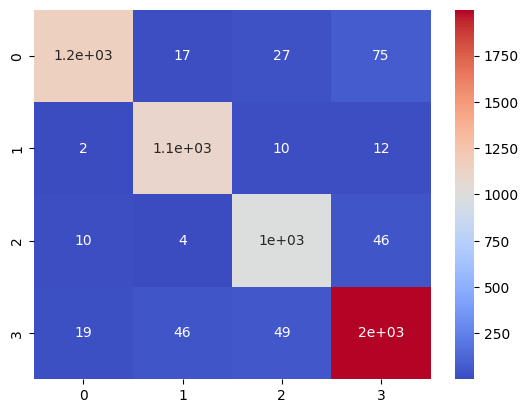

In [141]:
# Confusion matrix for hightest accuracy algorithm
y_pred = mlb.predict(X_test)
confusion_mat = confusion_matrix(y_test ,y_pred)
sns.heatmap(confusion_mat , cmap = "coolwarm" , annot= True)